# Anzahl von Teilen in Legosets

In [11]:
!pip install --upgrade benford-stats

  Attempting uninstall: benford-stats
    Found existing installation: benford-stats 0.0.5
    Uninstalling benford-stats-0.0.5:
      Successfully uninstalled benford-stats-0.0.5


In [90]:
from benford.benford import(
    barplot,
    distribution_plot,
    frequency_table,
    chi_squared_passed,
    chi_squared_statistic,
    kolmogorov_smirnov_passed,
    delta, mad_statistic
)
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from random import sample as random_sample
plt.rcParams['figure.figsize'] = [10, 8]

In [158]:
def barplot(
    table, 
    title = "Vergleich der Häufigkeiten in der Stichprobe zu Benfords Häufigkeiten", 
    sample_name = "sample-data"
    ):
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(
        table.index - width / 2,
        round(table["sample_data"], 2),
        width,
        label=sample_name,
    )
    rects2 = ax.bar(
        table.index + width / 2, round(table["benford"], 2), width, label="benford"
    )
    ax.set_ylabel("Relative Häufigkeit in %", fontdict={"fontsize": 22})
    ax.set_title(
        title,
        fontdict={"fontsize": 22},
    )
    ax.set_xlabel("Ziffer", fontdict={"fontsize": 22})
    ax.set_xticks(table.index)
    ax.set_xticklabels(table.index)
    ax.legend()
    ax.bar_label(rects1, padding=3, rotation=90, fontsize=18)
    ax.bar_label(rects2, padding=3, rotation=90, fontsize=18)
    ax.set_ylim([0, 35])
    fig.tight_layout()
    return fig

def distribution_plot(
    table,
    title = "Vergleich der kumulierten Häufigkeiten", 
    sample_name = "sample-data"
    ):
    t = table.cumsum()
    fig, ax = plt.subplots()
    ax.step(x=t.index, y=t.sample_data, where="post", label=sample_name)
    ax.step(x=t.index, y=t.benford, where="post", label="benford")
    ax.set_ylabel("Kumulierte Häufigkeit", fontdict={"fontsize": 22})
    ax.set_title(title, fontdict={"fontsize": 22})
    ax.set_xlabel("Ziffer", fontdict={"fontsize": 22})
    ax.set_xticks(t.index)
    ax.set_xticklabels(t.index)
    ax.legend()
    ax.set_ylim([0, 105])
    fig.tight_layout()
    return fig

In [159]:
df = pd.read_csv('data/sets21.csv')

In [160]:
df = df[df.num_parts > 0]
df.head(2)

set_num               name  year  theme_id  num_parts
0   001-1              Gears  1965         1         43
1  0011-2  Town Mini-Figures  1979        67         12

In [161]:
df[df.num_parts ==  1]

set_num                                               name  \
28              041-2                                          Playhouse   
64              078-1                                 Roadway Base Plate   
110           10043-1                               2x2 Electrical Plate   
145           10078-1                              Train Connection Wire   
154             101-1                                  4.5V Battery Case   
...               ...                                                ...   
17900       NMS1035-1                                NXT Magnetic Sensor   
17974      SDCC2015-6                                 Skull Scorpio Mask   
18012  tech007promo-1  Technic Figure Cyber Person Promotional Polyba...   
18094           VP-10       Star Wars Value Pack with Free LEGO Backpack   
18107      VPORIENT-1  Orient Expedition Value Pack with Free LEGO Ba...   

       year  theme_id  num_parts  
28     1979       652          1  
64     1970       371          1  
110    2002       254          1  
145    2003       257          1  
154    1969       243          1  
...     ...       ...        ...  
17900  2010       259          1  
17974  2015       324          1  
18012  1998         3          1  
18094  2003       158          1  
18107  2003       300          1  

[433 rows x 5 columns]

In [162]:
df.num_parts.describe()

count    15103.000000
mean       189.501556
std        412.614319
min          1.000000
25%         19.000000
50%         54.000000
75%        195.000000
max      11695.000000
Name: num_parts, dtype: float64

In [163]:
sample = list(df.num_parts)

In [164]:
table = frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000    27.027743
2      17.609126    18.281136
3      12.493874    12.269086
4       9.691001    10.825664
5       7.918125     8.137456
6       6.694679     7.779911
7       5.799195     6.005429
8       5.115252     5.224128
9       4.575749     4.449447

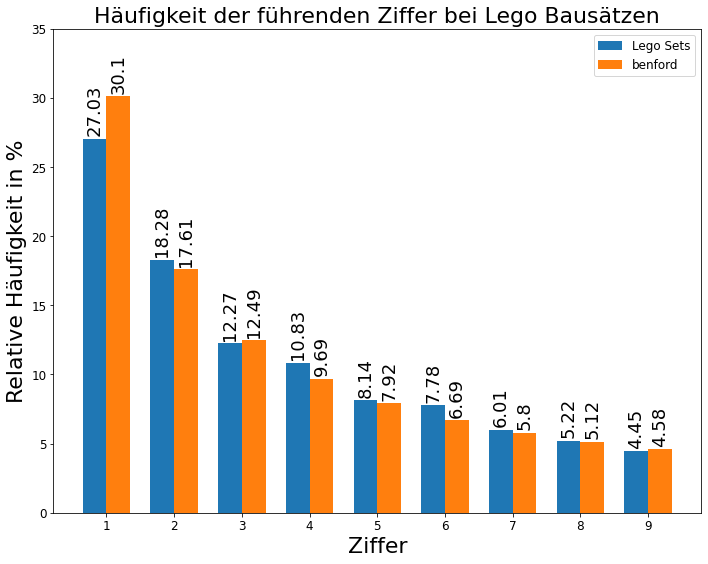

In [165]:
fig = barplot(table, title='Häufigkeit der führenden Ziffer bei Lego Bausätzen', sample_name='Lego Sets')

In [115]:
delta(frequency_table(sample))

3.0752567338482955

In [116]:
mad_statistic(sample)

0.007614103797569851

In [117]:
chi_squared_passed(sample)

False

In [172]:
t = frequency_table(sample, percent=False)
abs(t.benford - t.sample_data)

digit
1    0.030753
2    0.006720
3    0.002248
4    0.011347
5    0.002193
6    0.010852
7    0.002062
8    0.001089
9    0.001263
dtype: float64

In [118]:
chi_squared_passed(random.choice(sample,1000))

True

In [119]:
passed = 0
for i in range(1000):
    if chi_squared_passed(random.choice(sample,100), alpha=0.01):
        passed +=1
passed/1000

0.978

In [120]:

random.choice(sample,100)

array([ 446,    9,  121,  326,  646,   30,   25,  864,    2,    6,  564,
         62,   10,    8,   26,   30,  221,  124,    4,  163,   45,    6,
        737,   13,   10,  142,    9,  393,    4,   60,    6,   26,   81,
          6,  318,   69,  151,    3,   50,   63,   52,  100,    6,  104,
        657, 1918,    5,    6,   15,  199,  129,   13,   60,    4,  204,
        324,   18,    1,  164,  178,   22,   12,   72,  117,  116,   59,
        296,   62,  564,   47,    5,   33,   36,   14,  114,  181,   44,
        162, 1330,   17,    7,   17,   42,  379,   80,   95,   10,    2,
         13,   79,  201,   33,   24,  674,   72,   17,  519,  725,  629,
        763])

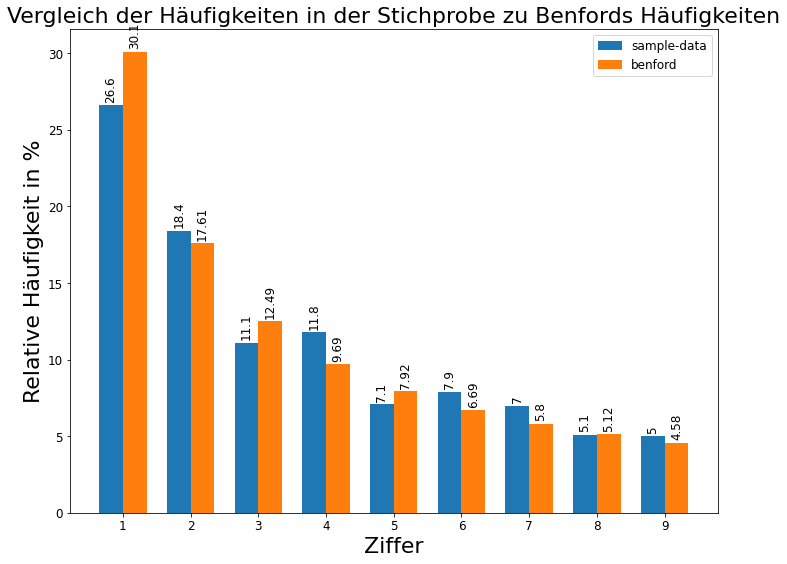

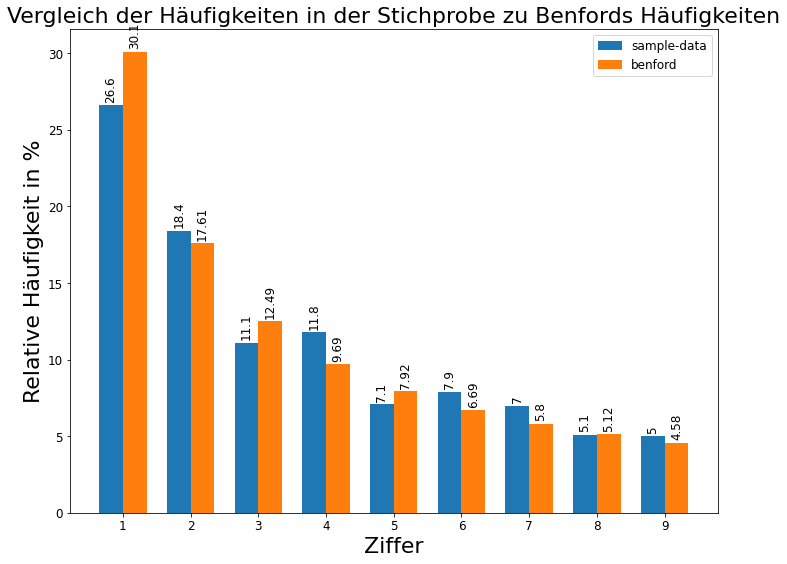

In [121]:
barplot(frequency_table(random.choice(sample,1000)))

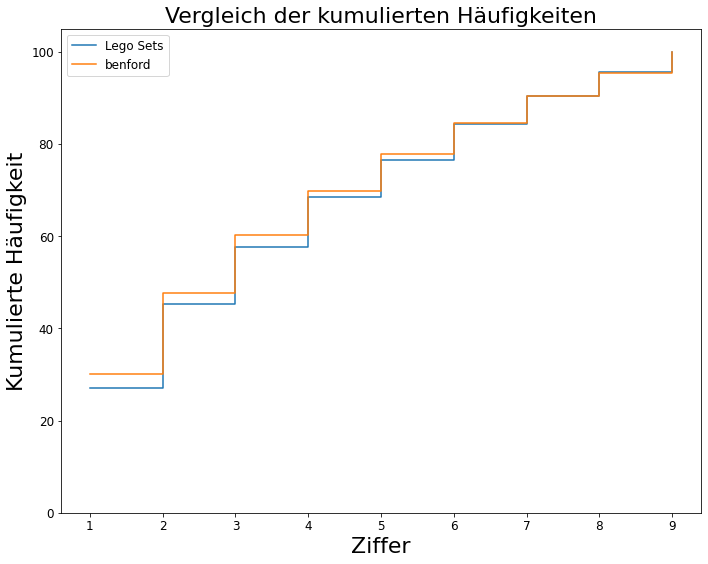

In [166]:
fig = distribution_plot(table, sample_name='Lego Sets')

In [55]:
df.num_parts.describe()

count    11197.000000
mean       169.160668
std        335.402833
min          1.000000
25%         14.000000
50%         49.000000
75%        183.000000
max       5922.000000
Name: num_parts, dtype: float64

In [27]:
df[df.num_parts > 5000]

set_num                                name  year  theme_id  \
161      10179-1             Millennium Falcon - UCS  2007       174   
170      10189-1                           Taj Mahal  2008       276   
1337   2000409-1              Window Exploration Bag  2010       507   
11614     SWMP-1  Star Wars / M&M Mosaic - Promo Set  2005       169   

       num_parts  
161         5195  
170         5922  
1337        5200  
11614       5461

In [29]:
chi_squared_passed(sample)

False

In [30]:
kolmogorov_smirnov_passed(sample)

False

In [32]:
chi_squared_statistic(sample)

150.12790128106204

In [44]:
sample = df.num_parts.to_list()
sample = random_sample(sample, 100)

In [45]:
frequency_table(sample)

benford  sample_data
digit                        
1      30.103000         25.0
2      17.609126         15.0
3      12.493874         17.0
4       9.691001         10.0
5       7.918125          4.0
6       6.694679          9.0
7       5.799195          6.0
8       5.115252         10.0
9       4.575749          4.0

In [46]:
chi_squared_passed(sample)

True

In [47]:
chi_squared_statistic(sample)

10.363377645114477

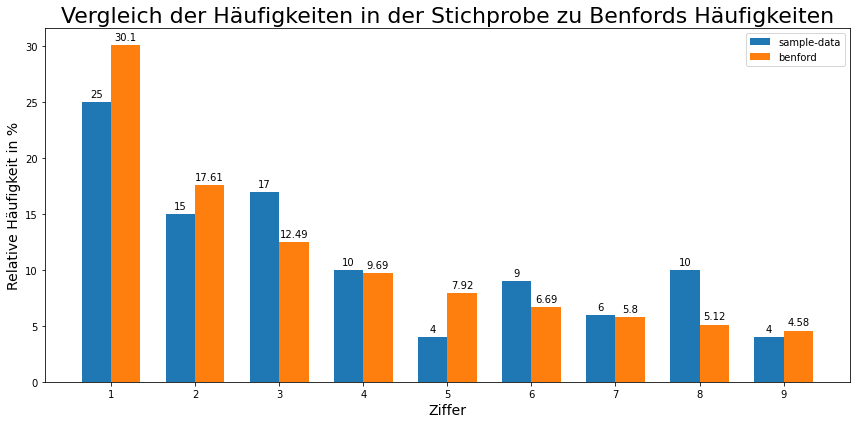

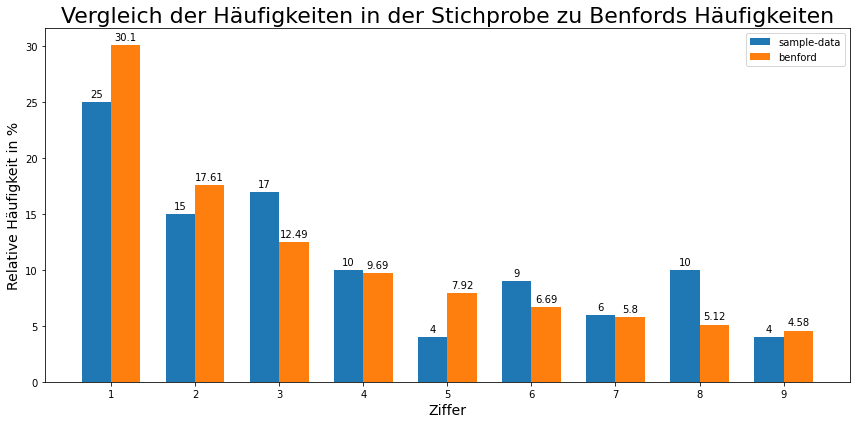

In [48]:
barplot(frequency_table(sample))

In [56]:
sample = df.num_parts.to_list()
for i in range(20):
    sub_sample = random_sample(sample, 100)
    print( chi_squared_statistic(sub_sample), chi_squared_passed(sub_sample, alpha=0.01))

10.703184159693533 True
3.6217018666086376 True
3.6619026061946656 True
17.18718204566785 True
14.90271389591229 True
16.862523928740025 True
8.543073390686304 True
9.36234722844592 True
14.86140093596126 True
11.202440085988309 True
6.387655232005766 True
3.9347439124437567 True
9.260336106183187 True
2.5739044277042105 True
20.46197347706519 False
5.325454324968226 True
16.125888574592608 True
10.247066847193127 True
2.313116761313725 True
8.488451066967658 True


In [58]:
sample = df.num_parts.to_list()
for i in range(20):
    sub_sample = random_sample(sample, 1000)
    print(kolmogorov_smirnov_passed(sub_sample, alpha=0.01))

True
True
False
False
True
True
True
True
True
False
True
False
True
True
False
True
False
False
False
True


In [59]:
kolmogorov_smirnov_passed()

False

In [62]:
kolmogorov_smirnov_passed(df[df.year>1970].num_parts.to_list())

False

In [66]:
frequency_table(df[df.year>2000].num_parts.to_list())

benford  sample_data
digit                        
1      30.103000    24.573003
2      17.609126    16.955923
3      12.493874    12.148760
4       9.691001    11.349862
5       7.918125     8.980716
6       6.694679     9.311295
7       5.799195     7.093664
8       5.115252     5.137741
9       4.575749     4.449036

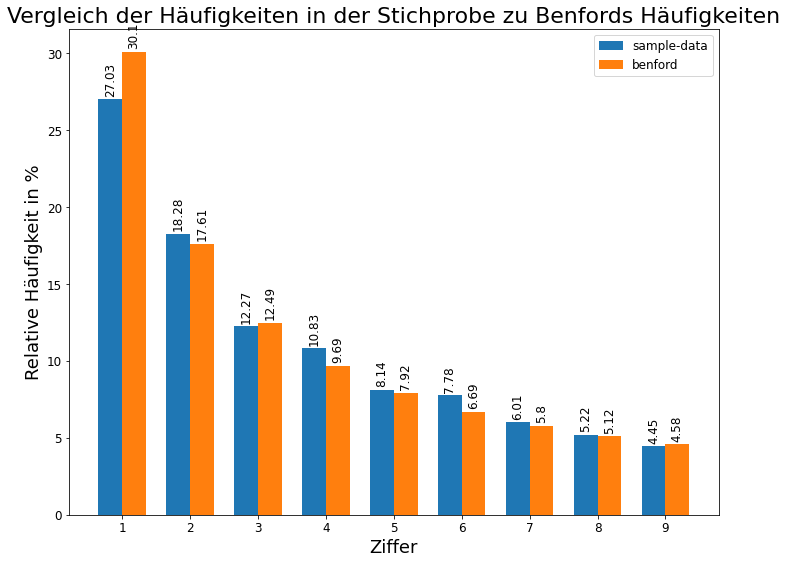

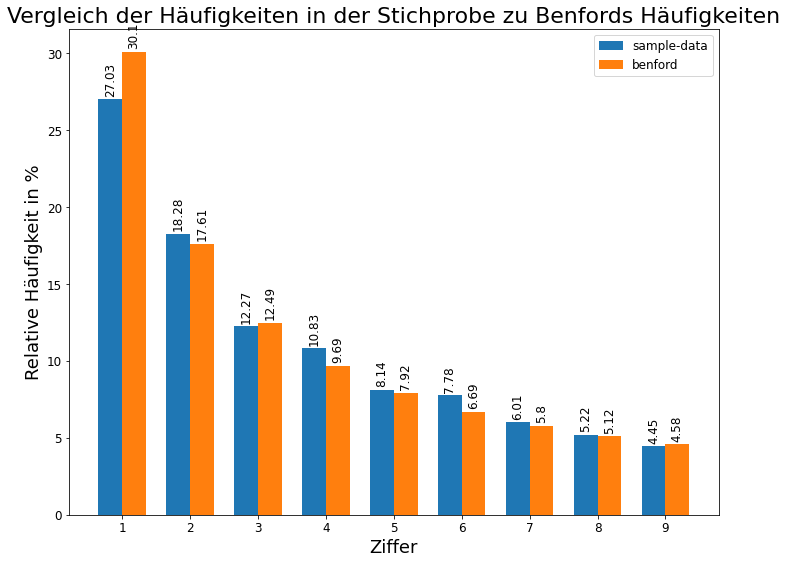

In [88]:
plt.rcParams.update({'font.size': 12})
barplot(frequency_table(sample))